In [8]:
import sys
sys.path.append('../')
import pystan
import stan_utility

import  arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import scipy.stats as stats
import seaborn as sb
import pandas as pd

In [24]:
Gamma_np_dict = {
    "Gamma_alpha=1_theta=2":np.random.gamma(1.,2.,size=10000),
    "Gamma_alpha=1_theta=4":np.random.gamma(1.,4.,size=10000),
    "Gamma_alpha=2_theta=1":np.random.gamma(2.,1.,size=10000),
    "Gamma_alpha=4_theta=1":np.random.gamma(4.,1.,size=10000),
}

#creating random values from gamma distribution with alpha = shape coefficient, theta = scale coefficient

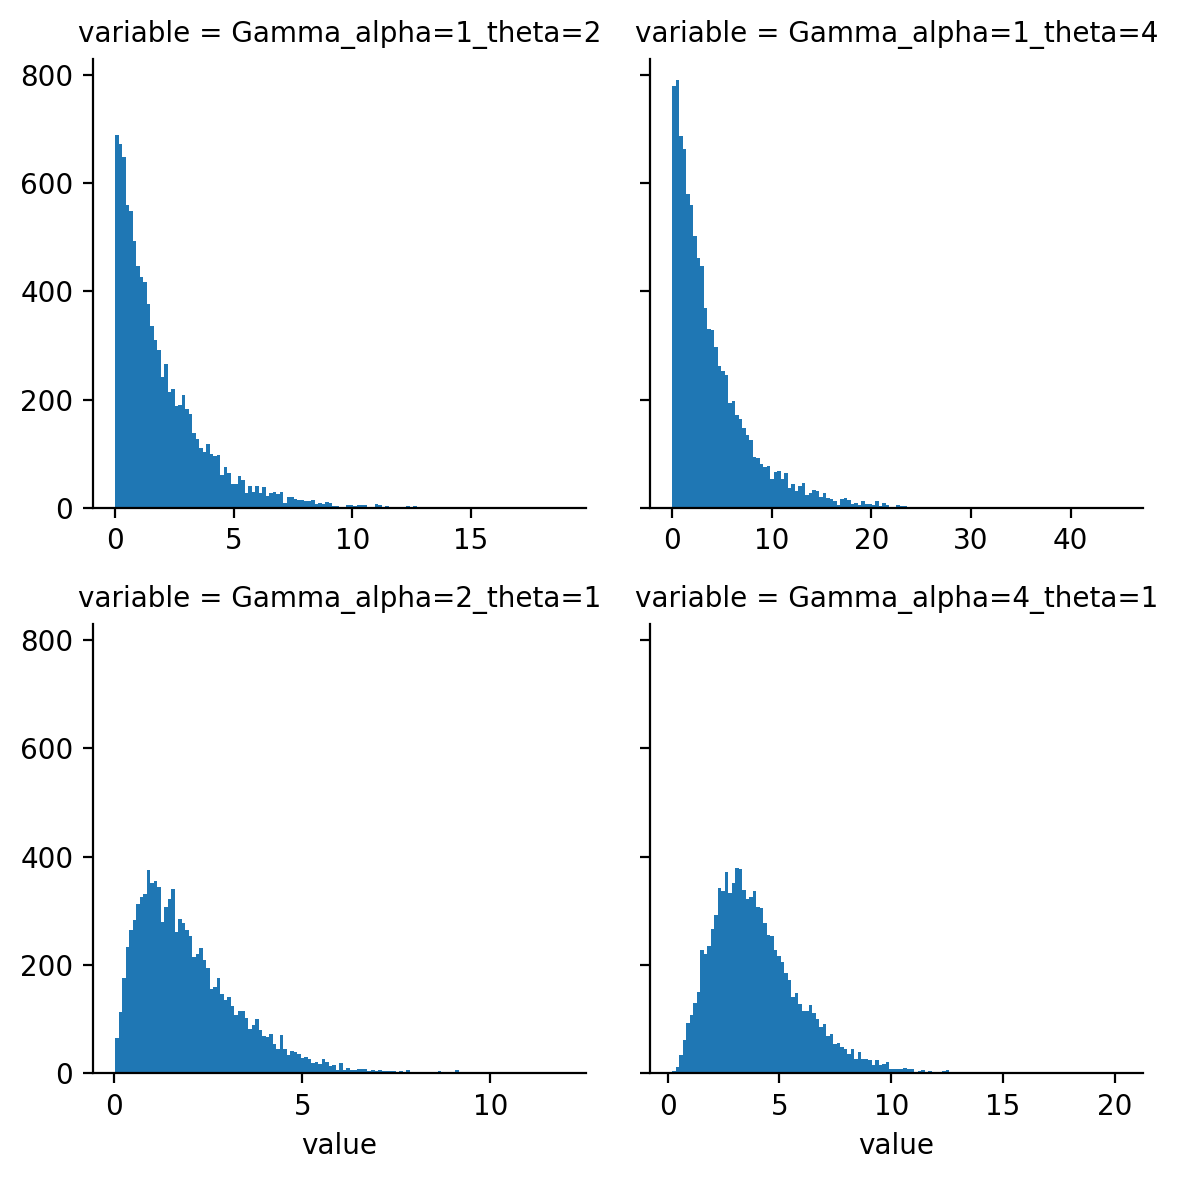

In [36]:
Dataframe = pd.DataFrame.from_dict(Gamma_np_dict)
Gamma_np_melted = Dataframe.melt()

Graph = sb.FacetGrid(Gamma_np_melted, col="variable", sharex=False, col_wrap = 2)
Graph.map(plt.hist, "value", cumulative=False, bins=128)

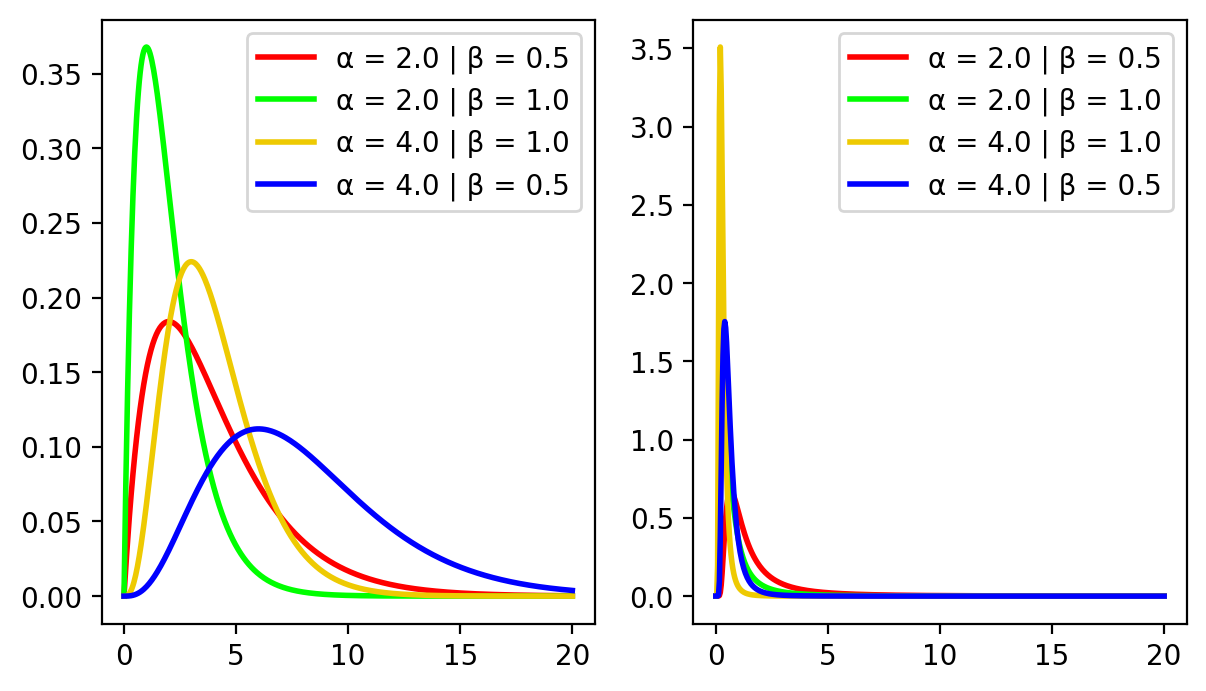

In [43]:
light = "#FFFCDC"
light_highlight = "#FEF590"
mid = "#FDED2A"
mid_highlight = "#F0DC05"
dark = "#EECA02"
dark_highlight = "#BB9700"
green = "#00FF00"
light_grey = "#DDDDDD"
red = "#FF0000"
blue = "#0000FF"

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi'] = 200

colors = [light, light_highlight, mid, mid_highlight, dark, dark_highlight, green, light_grey]

fig, axes = plt.subplots(1, 2, figsize = (7, 4))
x1 = np.linspace(0,20,500)
x2 = np.linspace(0,1.5,500)

alpha = 2.
beta = 0.5
axes[0].plot(x1,stats.gamma.pdf(x1,a=alpha,scale=1/beta), color=red, linewidth=2,label = u'α = '+ "2.0 | " + u'β = ' "0.5")

alpha = 2.
beta = 1.
axes[0].plot(x1,stats.gamma.pdf(x1,a=alpha,scale=1/beta), color=green, linewidth=2,label = u'α = '+ "2.0 | " + u'β = ' "1.0")

alpha = 4.
beta = 1.
axes[0].plot(x1,stats.gamma.pdf(x1,a=alpha,scale=1/beta), color=dark, linewidth=2,label = u'α = '+ "4.0 | " + u'β = ' "1.0")

alpha = 4.
beta = 0.5
axes[0].plot(x1,stats.gamma.pdf(x1,a=alpha,scale=1/beta), color=blue, linewidth=2,label = u'α = '+ "4.0 | " + u'β = ' "0.5")

alpha = 2.
beta = 0.5
axes[1].plot(x1,stats.invgamma.pdf(x1,a=alpha,scale=1/beta), color=red, linewidth=2,label = u'α = '+ "2.0 | " + u'β = ' "0.5")

alpha = 2.
beta = 1.
axes[1].plot(x1,stats.invgamma.pdf(x1,a=alpha,scale=1/beta), color=green, linewidth=2,label = u'α = '+ "2.0 | " + u'β = ' "1.0")

alpha = 4.
beta = 1.0
axes[1].plot(x1,stats.invgamma.pdf(x1,a=alpha,scale=1/beta), color=dark, linewidth=2,label = u'α = '+ "4.0 | " + u'β = ' "1.0")

alpha = 4.
beta = 0.5
axes[1].plot(x1,stats.invgamma.pdf(x1,a=alpha,scale=1/beta), color=blue, linewidth=2,label = u'α = '+ "4.0 | " + u'β = ' "0.5")

axes[0].legend()
axes[1].legend()

plt.show()

#on left we can see gamma distribution, on the right inverse gamma distribution

In [2]:
with open('PriorTune.stan', 'r') as file:
    print(file.read())

functions{
  vector tail_delta(vector y, vector theta, real[] x_r, int[] x_i){
  vector[2] deltas;
  deltas[1] = gamma_cdf(theta[1], y[1], y[2])) - 0.99;
  deltas[2] = gamma_cdf(theta[2], y[1], y[2])) - 0.01;
  return deltas;
  }
}
data{
  vector<lower=0>[2] y_guess;
  vector<lower=0>[2] theta;
}
transformed data{
  vector[2] y;
  real x_r[0];
  int x_i[0];

  y = algebra_solver(tail_delta, y_guess, theta, x_r, x_i, 1e-10, 1e-3, 1e3);

  print("Alpha = ", y[1]);
  print("Beta = ", y[2]);
}
generated quantities{
  real alpha = y[1];
  real beta = y[2];
}



In [13]:
model_prior=stan_utility.compile_model('PriorTune.stan')
#I have no idea why this won't work

ValueError: Failed to parse Stan model 'anon_model_7866331c4419f7a1e7668c300d5e0db6'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:
 error in 'unknown file name' at line 4, column 45
  -------------------------------------------------
     2:   vector tail_delta(vector y, vector theta, real[] x_r, int[] x_i){
     3:   vector[2] deltas;
     4:   deltas[1] = gamma_cdf(theta[1], y[1], y[2])) - 0.99;
                                                    ^
     5:   deltas[2] = gamma_cdf(theta[2], y[1], y[2])) - 0.01;
  -------------------------------------------------

PARSER EXPECTED: ";"


In [12]:
#since i can;t compile model, I can't really try out what works here, so this code doesn't matter
#R = 1000
#sim1 = model_prior.sampling(data = {"y_guess": np.random(2), "theta": np.array([10,5])}, algorithm = "Fixed_param", iter = R, warmup = 0, chains = 1, refresh = R, seed = 11062020)
#alpha = np.round(sim1.extract()['alpha'][0])
#beta = np.round(sim1.extract()['beta'][0])
#print(alpha)
#print(beta)

NameError: name 'model_prior' is not defined

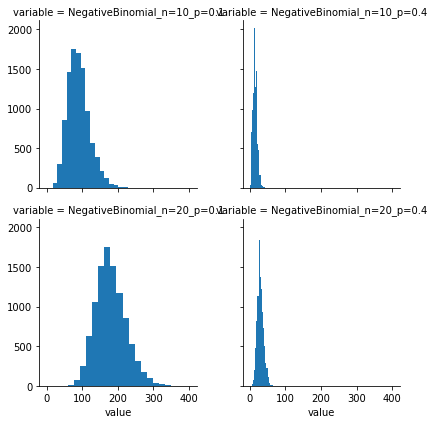

In [19]:
NegativeBinomial_dict = {
    "NegativeBinomial_n=10_p=0.1": np.random.negative_binomial(10,0.1,10000),
    "NegativeBinomial_n=10_p=0.4": np.random.negative_binomial(10,0.4,10000),
    "NegativeBinomial_n=20_p=0.1": np.random.negative_binomial(20,0.1,10000),
    "NegativeBinomial_n=20_p=0.4": np.random.negative_binomial(20,0.4,10000)
}

NegativeBinomial_df = pd.DataFrame.from_dict(NegativeBinomial_dict)
NegativeBinomial_melted = NegativeBinomial_df.melt()
Graph = sb.FacetGrid(NegativeBinomial_melted, col = "variable", sharex=True, col_wrap=2)
Graph.map(plt.hist, "value", cumulative=False, bins=20)

#Negative binomial returns number of failures before desired amount of successes was reached.
#The plots represent propability of succes

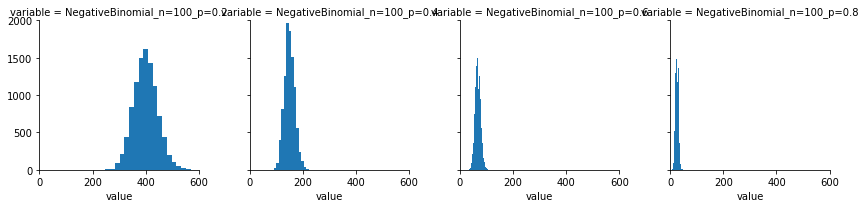

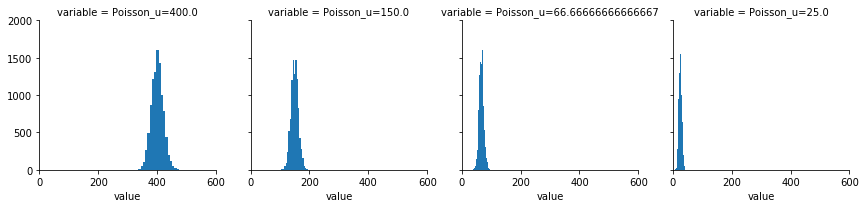

In [24]:
n = 100
p = [0.2, 0.4, 0.6, 0.8]

NegativeBinomial_comparison = {
    "NegativeBinomial_n=100_p=0.2": np.random.negative_binomial(n,p[0],10000),
    "NegativeBinomial_n=100_p=0.4": np.random.negative_binomial(n,p[1],10000),
    "NegativeBinomial_n=100_p=0.6": np.random.negative_binomial(n,p[2],10000),
    "NegativeBinomial_n=100_p=0.8": np.random.negative_binomial(n,p[3],10000)
}

u = [stats.nbinom.mean(n, x) for x in p]

Poisson_comparison = {
    "Poisson_u={}".format(u[0]): np.random.poisson(u[0],10000),
    "Poisson_u={}".format(u[1]): np.random.poisson(u[1],10000),
    "Poisson_u={}".format(u[2]): np.random.poisson(u[2],10000),
    "Poisson_u={}".format(u[3]): np.random.poisson(u[3],10000)
}

NegativeBinomial_df = pd.DataFrame.from_dict(NegativeBinomial_comparison)
NegativeBinomial_melted = NegativeBinomial_df.melt()
Graph = sb.FacetGrid(NegativeBinomial_melted, col = "variable", sharex=True, col_wrap=4)
Graph.map(plt.hist, "value", cumulative=False, bins=20)
Graph.set(xlim = (0,600), ylim = (0,2000))

Poisson_df = pd.DataFrame.from_dict(Poisson_comparison)
Poisson_melted = Poisson_df.melt()
Graph = sb.FacetGrid(Poisson_melted, col = "variable", sharex=True, col_wrap=4)
Graph.map(plt.hist, "value", cumulative=False, bins=20)
Graph.set(xlim = (0,600), ylim = (0,2000))

#We can observe that values from poisson distributin are more "dense" than from negative binomial dostribution.
#Binomial shows amount of failures it took to achieve goal, while poisson shows possibility of occurance of goal based on given propability

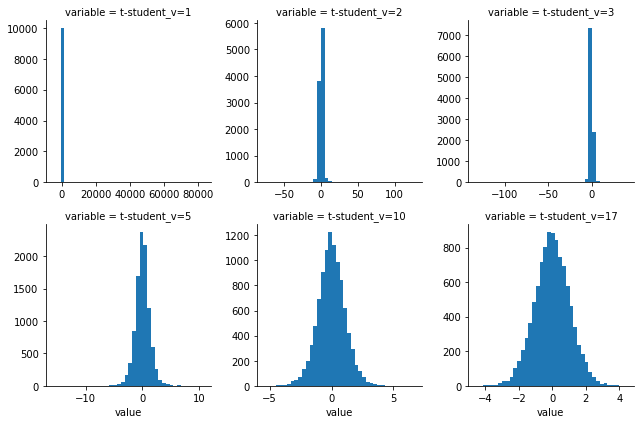

In [28]:
tstudent_dict = {
    "t-student_v=1": np.random.standard_t(1,10000),
    "t-student_v=2": np.random.standard_t(2,10000),
    "t-student_v=3": np.random.standard_t(3,10000),
    "t-student_v=5": np.random.standard_t(5,10000),
    "t-student_v=10": np.random.standard_t(10,10000),
    "t-student_v=17": np.random.standard_t(17,10000)
}

tstudent_df = pd.DataFrame.from_dict(tstudent_dict)
tstudent_melted = tstudent_df.melt()
Graph = sb.FacetGrid(tstudent_melted, col = "variable", sharex=False, sharey=False, col_wrap=3)
Graph.map(plt.hist, "value", cumulative=False, bins=40)

#incresing number of degrees of freedom makes t-student distribution look more like Gaussian distribution

In [35]:
ts1 = np.random.standard_t(1,10)
ts2 = np.random.standard_t(1,100)
ts3 = np.random.standard_t(1,1000)
ts4 = np.random.standard_t(1,10000)

m1 = np.mean(ts1)
m2 = np.mean(ts2)
m3 = np.mean(ts3)
m4 = np.mean(ts4)

print("mean for 10 samples = {}".format(m1))
print("mean for 100 samples = {}".format(m2))
print("mean for 1000 samples = {}".format(m3))
print("mean for 10000 samples = {}".format(m4))

var1 = np.var(ts1,ddof=1)
var2 = np.var(ts2,ddof=1)
var3 = np.var(ts3,ddof=1)
var4 = np.var(ts4,ddof=1)

print("variance for 10 samples = {}".format(var1))
print("variance for 100 samples = {}".format(var2))
print("variance for 1000 samples = {}".format(var3))
print("variance for 10000 samples = {}".format(var4))

#mean doesn't change a lot with increasing sample number, but variance increases significantly

mean for 10 samples = 2.37742463951384
mean for 100 samples = 2.3059250459276255
mean for 1000 samples = -0.4151461572983237
mean for 10000 samples = -0.2861939328939009
variance for 10 samples = 23.520078150310663
variance for 100 samples = 590.8233986306587
variance for 1000 samples = 643.1081691169583
variance for 10000 samples = 3533.818847004914
